In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h2 style="color:blue" align="left"> 1. Load Data </h2>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
df.count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

<h2 style="color:blue" align="left"> 2. Missing Values </h2>

In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

<h2 style="color:blue" align="left"> 3. EDA(Exploratory Data Analysis) </h2>

In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [10]:
a = pd.DataFrame(df['Weight'])
b = pd.DataFrame(df['Height'])

In [11]:
import statsmodels.api as sms
model = sms.OLS(b,a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.726e+05
Date:                Tue, 28 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:17:57   Log-Likelihood:                         -36774.
No. Observations:               10000   AIC:                                  7.355e+04
Df Residuals:                    9999   BIC:                                  7.356e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.3997      0.001    687.489      0.000       0.399       0.401
==============================================================================
Omnibus:                      980.306   Durbin-Watson:                   0.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.234
Skew:                          -0.020   Prob(JB):                     2.57e-63
Kurtosis:                       2.169   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

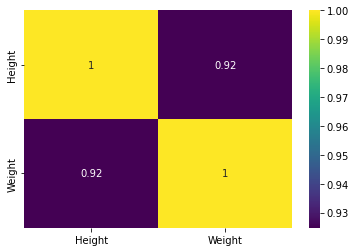

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

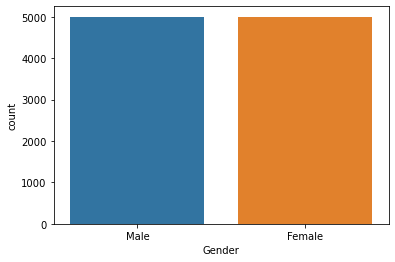

In [13]:
sns.countplot(df.Gender)

<AxesSubplot:xlabel='Gender', ylabel='Height'>

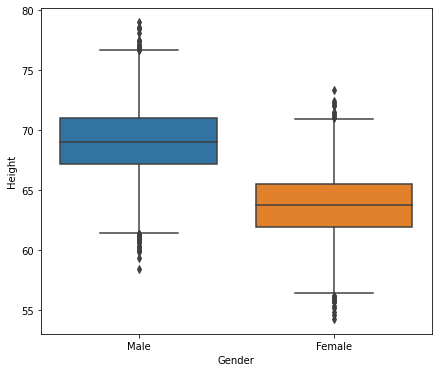

In [14]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Height', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

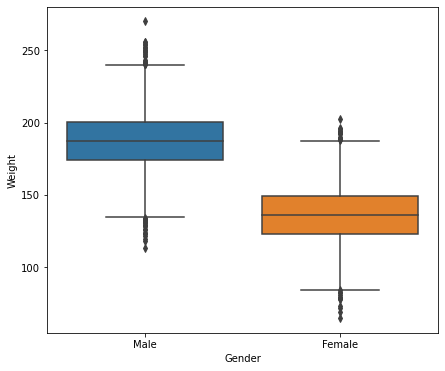

In [15]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Weight', data=df)

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


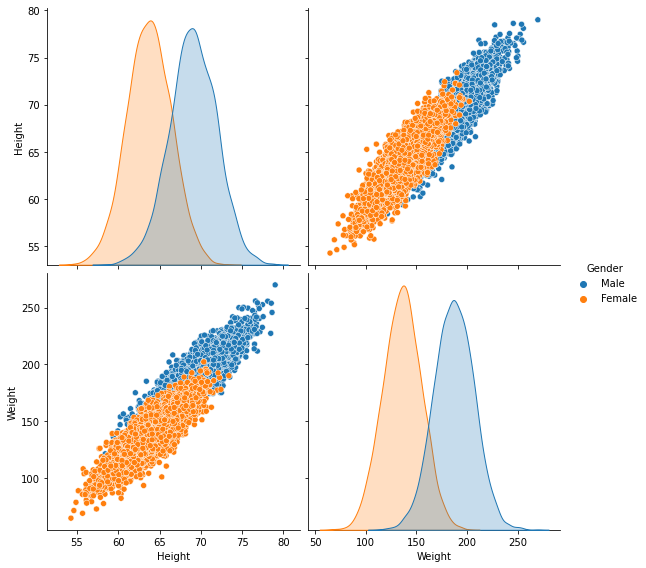

In [16]:
sns.pairplot(df, hue='Gender', size=4)

<h2 style="color:green" align="left"> Univariate Analysis ---->  plotting only a single feature </h2>

### a. histogram

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


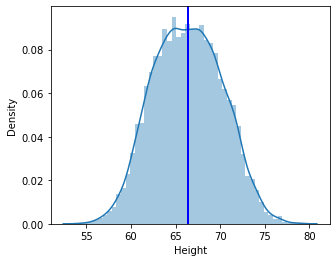

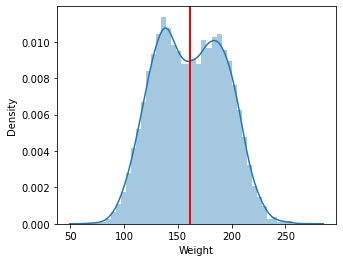

In [17]:
plt.figure(figsize=(5, 4))
sns.distplot(df['Height']);
plt.axvline(df['Height'].mean(),color='blue',linewidth=2)

plt.figure(figsize=(5, 4))
sns.distplot(df['Weight']);
plt.axvline(df['Weight'].mean(),color='red',linewidth=2)

In [23]:
plt.figure(figsize=(7,6))

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

In [22]:
Male['Height'].plot(kind='hist',bins=50, alpha=0.3,color='blue')
females['Height'].plot(kind='hist',bins=50, alpha=0.3,color='red')
plt.title('Height distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height in')
plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red',linewidth=2);

NameError: name 'Male' is not defined

<Figure size 504x432 with 0 Axes>


### b. kde plot (kernel distribution estimation)

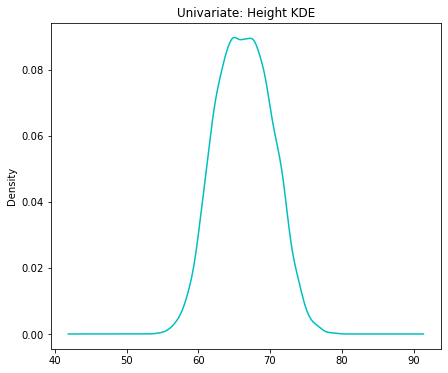

In [24]:
plt.figure(figsize=(7,6))
df.Height.plot(kind="kde", title='Univariate: Height KDE', color='c');

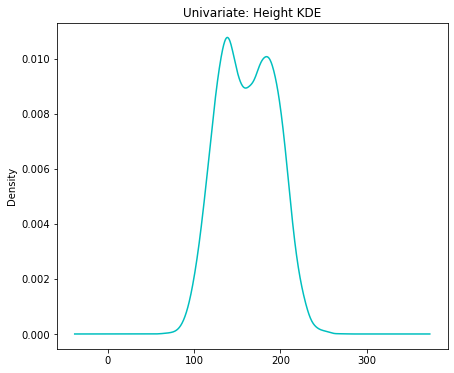

In [25]:
plt.figure(figsize=(7,6))
df.Weight.plot(kind="kde", title='Univariate: Height KDE', color='c');

### c. Boxplot

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

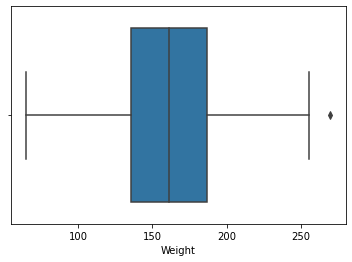

In [26]:
sns.boxplot(df.Weight)

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

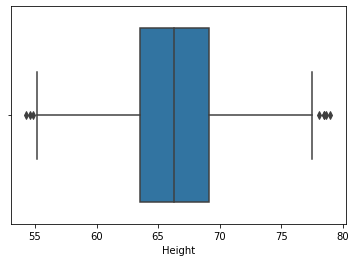

In [27]:
sns.boxplot(df.Height)


<h2 style="color:green" align="left"> Bivariate Analysis ---->  plotting two variables </h2>

###         a. Scatter plot

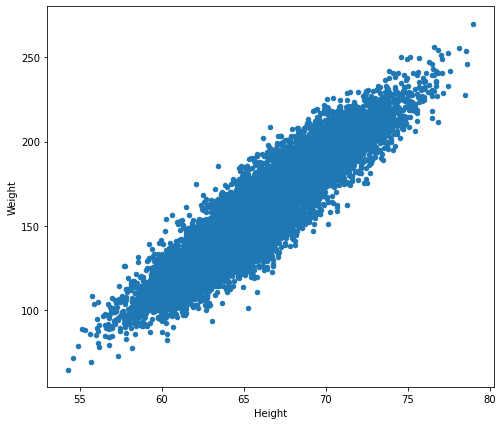

In [28]:
df.plot(figsize=(8,7), kind='scatter',x='Height',y='Weight');

- From above graph observed, there is a linear relationship b/n Height and Weight. As height increases weight also increases.

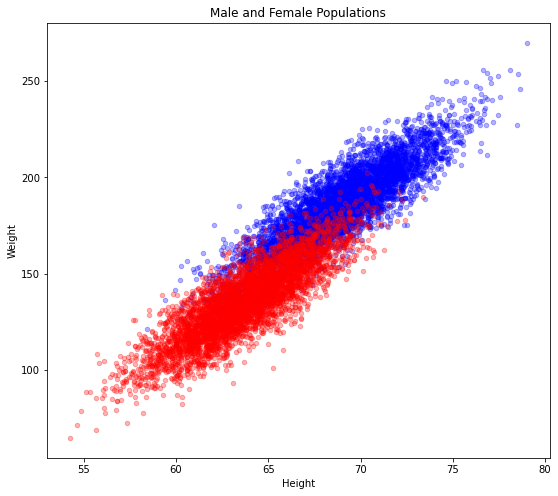

In [29]:
males=df[df['Gender']=='Male']
females=df[df['Gender']=='Female']
fig,ax = plt.subplots()
males.plot(figsize=(9,8), kind='scatter', x='Height', y='Weight', ax=ax, color='blue',alpha=0.3, title='Male and Female Distribution')
females.plot(figsize=(9,8), kind='scatter', x='Height', y='Weight', ax=ax, color='red', alpha=0.3, title='Male and Female Populations');

- Observed from graph, compared to men womens are less height and weight.

<h2 style="color:green" align="left"> Outliers </h2>

<h3 style='color:purple'> 1. Detect outliers using IQR </h3>
### Height

In [30]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [31]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [32]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

- Here are the outliers

In [33]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


### Remove ouliers from Height column

In [34]:
df_no_outlier_height = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier_height

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Weight

In [35]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [36]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [37]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [38]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
4794,Male,58.406905,121.338323
5014,Female,58.438249,98.192621
5026,Female,56.547975,84.872124
5074,Female,56.159458,90.815256
5122,Female,57.103869,93.506316
...,...,...,...
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
9913,Female,58.351003,110.122151
9922,Female,58.752489,106.846041


### Remove ouliers from Height column

In [39]:
df_no_outlier_Weight = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier_Weight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<h2 style="color:blue" align="left"> Data Preprocessing </h2>

### Converting Categorical Variables to Numeric by using Pandas get_Dummies

In [40]:
df[['Female','Male']] = pd.get_dummies(df['Gender'])
df.head()

,Gender,Height,Weight,Female,Male
0,Male,73.847017,241.893563,0,1
1,Male,68.781904,162.310473,0,1
2,Male,74.110105,212.740856,0,1
3,Male,71.730978,220.042470,0,1
4,Male,69.881796,206.349801,0,1


In [41]:
df.drop('Gender',axis=1,inplace=True)

In [ ]:
df.head()

### Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X = df.drop('Height',axis=1)
y = df['Height']

### Train the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

In [ ]:
y_pred = LinReg.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
LinReg.score(X_test, y_test)

In [ ]:
print(LinReg.coef_)
print(LinReg.intercept_)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(X_train.Weight, y_train)
plt.plot(X_train.Weight, LinReg.predict(X_train), c='r')

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(X_test.Weight, y_test,color='r')
plt.plot(X_test.Weight,y_pred, c='b')

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [ ]:
Output = pd.DataFrame(X_test['Weight'], y_test)
Output